In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn import svm, model_selection as ms, metrics

# Ex. 4

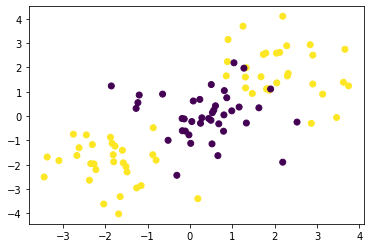

In [62]:
seed = 1
np.random.seed(seed)
X = np.random.normal(size=200).reshape(100, 2)
X[:30] = X[:30] + 2
X[30:60] = X[30:60] - 2
y = np.concatenate((np.ones(60), -np.ones(40)))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [63]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=.25, random_state=seed)

In [64]:
def plot_decision(model, X, y):

    h = .02  # step size in the mesh

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(model.kernel)


Test accuracy: 0.52


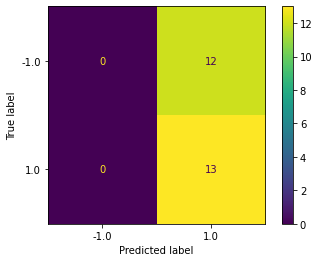

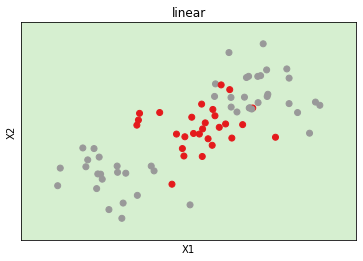

In [67]:
model = svm.SVC(kernel='linear', probability=True, random_state=seed)
model.fit(X_train, y_train)

metrics.plot_confusion_matrix(model, X_test, y_test)
plt.figure()
plot_decision(model, X_train, y_train)
print(f'Test accuracy: {metrics.accuracy_score(y_test, model.predict(X_test))}')

Test accuracy: 0.96


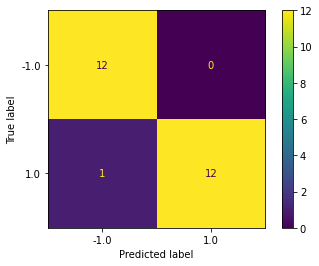

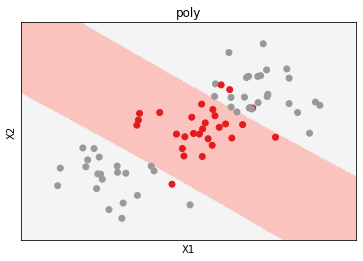

In [70]:
model = svm.SVC(kernel='poly', degree=2, probability=True, random_state=seed)
model.fit(X_train, y_train)

metrics.plot_confusion_matrix(model, X_test, y_test)
plt.figure()
plot_decision(model, X_train, y_train)
print(f'Test accuracy: {metrics.accuracy_score(y_test, model.predict(X_test))}')

Test accuracy: 0.84


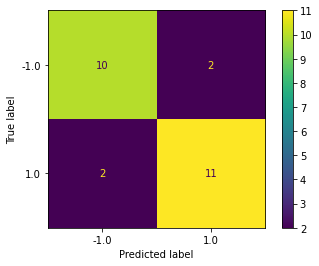

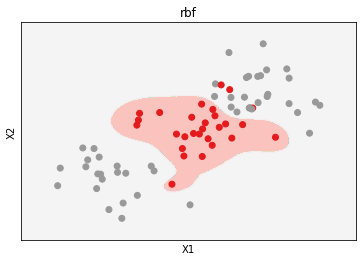

In [69]:
model = svm.SVC(kernel='rbf', gamma=2, probability=True, random_state=seed)
model.fit(X_train, y_train)

metrics.plot_confusion_matrix(model, X_test, y_test)
plt.figure()
plot_decision(model, X_train, y_train)
print(f'Test accuracy: {metrics.accuracy_score(y_test, model.predict(X_test))}')

Plots show that poly kernel with 2 degrees performs best on test data.

# Ex. 5

In [ ]:
seed = 1
np.random.seed(seed)
X = np.random.normal(size=200).reshape(100, 2)
X[:30] = X[:30] + 2
X[30:60] = X[30:60] - 2
y = np.concatenate((np.ones(60), -np.ones(40)))
plt.scatter(X[:, 0], X[:, 1], c=y)